## Real Estate Price Predictor


In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv('D:\\ML Project\\data1.csv.csv')
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
df.shape


(506, 14)

In [4]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [5]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
df['chas'].value_counts()

0    471
1     35
Name: chas, dtype: int64

In [8]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.288719,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704501,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.887000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.211000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.629000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<AxesSubplot:title={'center':'crim'}>,
        <AxesSubplot:title={'center':'zn'}>,
        <AxesSubplot:title={'center':'indus'}>,
        <AxesSubplot:title={'center':'chas'}>],
       [<AxesSubplot:title={'center':'nox'}>,
        <AxesSubplot:title={'center':'rm'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'dis'}>],
       [<AxesSubplot:title={'center':'rad'}>,
        <AxesSubplot:title={'center':'tax'}>,
        <AxesSubplot:title={'center':'ptratio'}>,
        <AxesSubplot:title={'center':'b'}>],
       [<AxesSubplot:title={'center':'lstat'}>,
        <AxesSubplot:title={'center':'medv'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

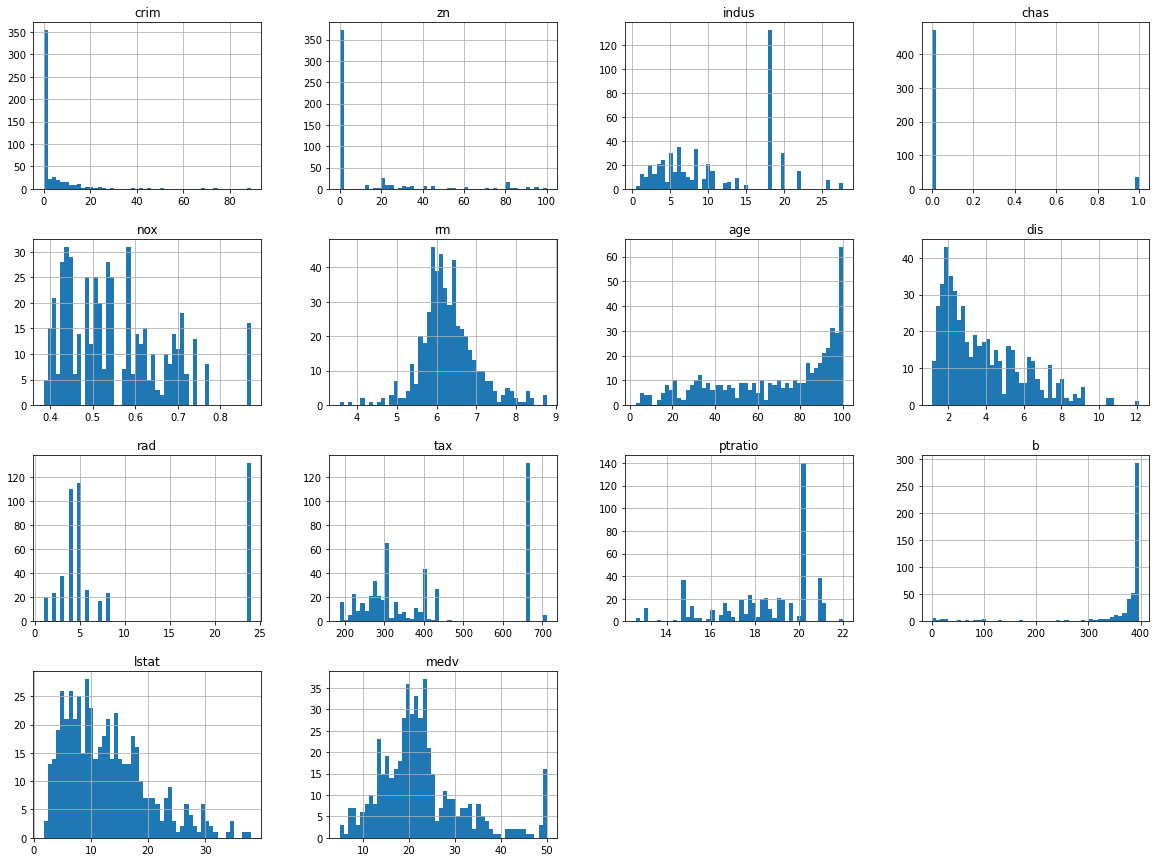

In [9]:
##Ploting Histogram
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(20,15))

# # Train Test Splitting

In [10]:
##for learning purpose
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled=np.random.permutation(len(data))
    print(shuffled)
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled[:test_set_size]
    train_indices=shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [11]:
train_set,test_set=split_train_test(df,0.2)

[173 274 491  72 452  76 316 140 471 500 218   9 414  78 323 473 124 388
 195 448 271 278  30 501 421 474  79 454 210 497 172 320 375 362 467 153
   2 336 208  73 496 307 204  68  90 390  33  70 470   0  11 281  22 101
 268 485 442 290  84 245  63  55 229  18 351 209 395  82  39 456  46 481
 444 355  77 398 104 203 381 489  69 408 255 392 312 234 460 324  93 137
 176 417 131 346 365 132 371 412 436 411  86  75 477  15 332 423  19 325
 335  56 437 409 334 181 227 434 180  25 493 238 244 250 418 117  42 322
 347 182 155 280 126 329  31 113 148 432 338  57 194  24  17 298  66 211
 404  94 154 441  23 225 433 447   5 116  45  16 468 360   3 405 185  60
 110 321 265  29 262 478  26   7 492 108  37 157 472 118 114 175 192 272
 144 373 383 356 277 220 450 141 369  67 361 168 499 394 400 193 249 109
 420 145  92 152 222 304  83 248 165 163 199 231  74 311 455 253 119 284
 302 483 357 403 228 261 237 386 476  36 196 139 368 247 287 378  59 111
  89 266   6 364 503 341 158 150 177 397 184 318  1

In [12]:
from sklearn.model_selection import train_test_split 
train_set,test_set=train_test_split(df,test_size=0.2,random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}")

Rows in train set: 404
Rows in test set: 102


In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index,test_index in split.split(df,df['chas']):
    strat_train_set=df.loc[train_index]
    strat_test_set=df.loc[test_index]

In [14]:
strat_test_set['chas'].value_counts()

0    95
1     7
Name: chas, dtype: int64

In [15]:
strat_train_set['chas'].value_counts()

0    376
1     28
Name: chas, dtype: int64

In [16]:
df=strat_train_set.copy()

# # Looking for correlation

In [17]:
corr_matrix=df.corr()
corr_matrix

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.212927,0.416640,-0.061482,0.430879,-0.260885,0.361890,-0.386900,0.648221,0.603934,0.305603,-0.486869,0.471442,-0.393715
zn,-0.212927,1.000000,-0.542161,-0.023536,-0.509327,0.291945,-0.565680,0.666939,-0.306480,-0.322803,-0.390570,0.188575,-0.420097,0.339741
indus,0.416640,-0.542161,1.000000,0.043686,0.759051,-0.387276,0.644114,-0.708612,0.580908,0.716288,0.384465,-0.368685,0.611068,-0.473516
chas,-0.061482,-0.023536,0.043686,1.000000,0.077490,0.098456,0.058388,-0.088081,-0.023005,-0.048802,-0.132682,0.048275,-0.077592,0.205066
nox,0.430879,-0.509327,0.759051,0.077490,1.000000,-0.302544,0.727358,-0.763623,0.596012,0.659049,0.164977,-0.408434,0.602386,-0.422873
rm,-0.260885,0.291945,-0.387276,0.098456,-0.302544,1.000000,-0.245519,0.209532,-0.204603,-0.287451,-0.329960,0.122065,-0.601531,0.680494
age,0.361890,-0.565680,0.644114,0.058388,0.727358,-0.245519,1.000000,-0.734827,0.449489,0.501491,0.259633,-0.287900,0.599211,-0.364596
dis,-0.386900,0.666939,-0.708612,-0.088081,-0.763623,0.209532,-0.734827,1.000000,-0.481556,-0.530840,-0.215173,0.309222,-0.501408,0.240451
rad,0.648221,-0.306480,0.580908,-0.023005,0.596012,-0.204603,0.449489,-0.481556,1.000000,0.910932,0.471912,-0.490951,0.479857,-0.374693
tax,0.603934,-0.322803,0.716288,-0.048802,0.659049,-0.287451,0.501491,-0.530840,0.910932,1.000000,0.473026,-0.475293,0.534228,-0.456657


In [18]:
## Correlation coefficient formulas are used to find how strong a relationship is between data.
## The formulas return a value between -1 and 1, where:
## 1 indicates a strong positive relationship.
##-1 indicates a strong negative relationship.
## A result of zero indicates no relationship at all.

corr_matrix['medv'].sort_values(ascending=False)

medv       1.000000
rm         0.680494
b          0.361761
zn         0.339741
dis        0.240451
chas       0.205066
age       -0.364596
rad       -0.374693
crim      -0.393715
nox       -0.422873
tax       -0.456657
indus     -0.473516
ptratio   -0.493534
lstat     -0.740494
Name: medv, dtype: float64

array([[<AxesSubplot:xlabel='medv', ylabel='medv'>,
        <AxesSubplot:xlabel='rm', ylabel='medv'>,
        <AxesSubplot:xlabel='zn', ylabel='medv'>,
        <AxesSubplot:xlabel='lstat', ylabel='medv'>],
       [<AxesSubplot:xlabel='medv', ylabel='rm'>,
        <AxesSubplot:xlabel='rm', ylabel='rm'>,
        <AxesSubplot:xlabel='zn', ylabel='rm'>,
        <AxesSubplot:xlabel='lstat', ylabel='rm'>],
       [<AxesSubplot:xlabel='medv', ylabel='zn'>,
        <AxesSubplot:xlabel='rm', ylabel='zn'>,
        <AxesSubplot:xlabel='zn', ylabel='zn'>,
        <AxesSubplot:xlabel='lstat', ylabel='zn'>],
       [<AxesSubplot:xlabel='medv', ylabel='lstat'>,
        <AxesSubplot:xlabel='rm', ylabel='lstat'>,
        <AxesSubplot:xlabel='zn', ylabel='lstat'>,
        <AxesSubplot:xlabel='lstat', ylabel='lstat'>]], dtype=object)

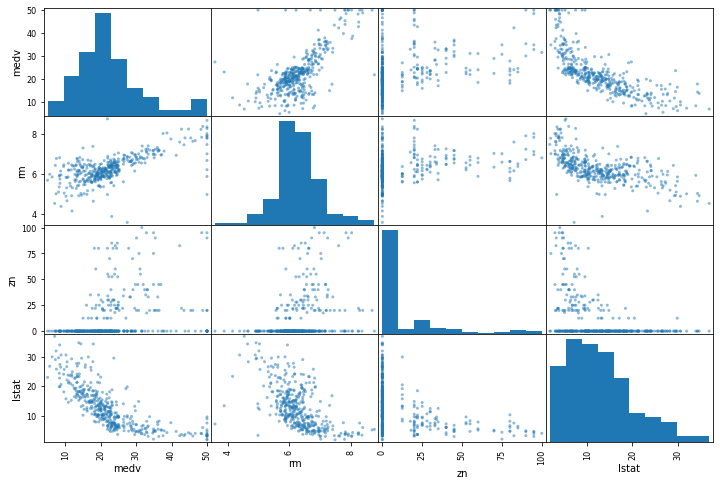

In [19]:
from pandas.plotting import scatter_matrix
attributes=['medv','rm','zn','lstat']
scatter_matrix(df[attributes],figsize=(12,8))

<AxesSubplot:xlabel='rm', ylabel='medv'>

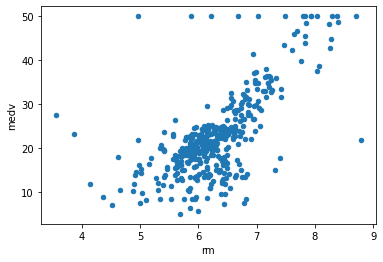

In [20]:
##alpha used for darker values in the plot

df.plot(kind='scatter',x='rm',y='medv',alpha=1)

<AxesSubplot:xlabel='lstat', ylabel='medv'>

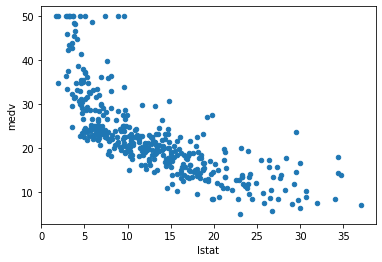

In [21]:
df.plot(kind='scatter',x='lstat',y='medv')

# # Trying out attribute combination


In [22]:
# df['taxrm']=df['tax']/df['rm']

In [23]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0


In [24]:
corr_matrix=df.corr()
corr_matrix['medv'].sort_values(ascending=False)

medv       1.000000
rm         0.680494
b          0.361761
zn         0.339741
dis        0.240451
chas       0.205066
age       -0.364596
rad       -0.374693
crim      -0.393715
nox       -0.422873
tax       -0.456657
indus     -0.473516
ptratio   -0.493534
lstat     -0.740494
Name: medv, dtype: float64

In [25]:
# df.plot(kind='scatter',x='taxrm',y='medv',alpha=1)

In [26]:
df=strat_train_set.drop('medv',axis=1)
df_labels=strat_train_set['medv'].copy()

# # Missing Attributes

In [27]:
#Checking the correlation is important in order to do any operations 
#regarding missing attributes. 
# To take care of missing attributes, you have three options :
#     get rid of missing data points
#     get rid of the whole attribute
#     Set the value to some value(0,mean or median)


In [28]:
#for option number one
a=df.dropna(subset=['rm'])
a.shape

(399, 13)

In [29]:
#for second option
a=df.drop('rm',axis=1)
a.shape
# NOTE that there is no rm column and also orignal df dataframe will remain unchanged

(404, 12)

In [30]:
#for third option
median=df['rm'].median()
median

6.218999999999999

In [31]:
df['rm'].fillna(median)
#NOTE orignal dataframe is unchanged

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: rm, Length: 404, dtype: float64

In [32]:
df.describe()
#Before we started filling missing attributes

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.284977,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.715474,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.879500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.219000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.633000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [33]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
imputer.fit(df)

SimpleImputer(strategy='median')

In [34]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [35]:
X=imputer.transform(df)

In [36]:
df_tr=pd.DataFrame(X,columns=df.columns)

In [37]:
df_tr.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.284161,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.711059,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.883000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.219000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


# # Scikit- learn-Design


In [38]:
# Primarily three types of object 
# Estimators-It estimates some parameters based on a dataset. eg Imputer 
# it has Fit method and transform method
# Fit method -Fits the dataset and calculate internal parameters
# Transformers-transform method takes the input and returns the output based on
# the learning from fit().It also has a convenience function fit _transform() which 
# fits and then transforms.
# Predictors - LinearRegression model is an example of predictor.fit() and 
# predict() are two common functions. It also gives score() function which will
# evaluate the prediction


# # Feature Scaling


In [39]:
# Primarily two types of feature scaling methods:
#     Min-Max scaling(Normalization)
#         (value-min)/(max-min)
#     sklearn provides a class called MinMaxScaler for this


#     standardization   
#          (value-mean)/std
#      sklearn provides a class called StandardScaler for this

# # Creating pipeline

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([('imputer',SimpleImputer(strategy='median')),
                     ('std_scaler',StandardScaler())])

In [41]:
df_num_tr=my_pipeline.fit_transform(df_tr)

In [42]:
df_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

 ## Selecting a desired model for Real Estates

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
# model=LinearRegression()
model=DecisionTreeRegressor()
model.fit(df_num_tr,df_labels)

DecisionTreeRegressor()

In [44]:
some_data=df.iloc[:5]

In [45]:
some_labels=df_labels.iloc[:5]

In [46]:
prepaired_data=my_pipeline.transform(some_data)

In [47]:
model.predict(prepaired_data)

array([21.9, 24.5, 16.7, 23.1, 23. ])

In [48]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model 

In [49]:
from sklearn.metrics import mean_squared_error
df_prediction=model.predict(df_num_tr)
mse=mean_squared_error(df_labels,df_prediction)
rmse=np.sqrt(mse)

In [50]:
rmse

0.0

# Using better evaluation technique-Cross Validation

In [51]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,df_num_tr,df_labels,scoring='neg_mean_squared_error',cv=10)
rmse_scores=np.sqrt(-scores)

In [52]:
rmse_scores

array([3.9426684 , 5.74409559, 5.62206021, 3.80436207, 4.03670658,
       2.67418212, 6.29074717, 3.50199943, 3.23763031, 4.12052788])

In [53]:
def print_scores(scores):
    print('Scores:',scores)
    print('Mean:',scores.mean())
    print('stanD:',scores.std())

In [54]:
print_scores(rmse_scores)

Scores: [3.9426684  5.74409559 5.62206021 3.80436207 4.03670658 2.67418212
 6.29074717 3.50199943 3.23763031 4.12052788]
Mean: 4.297497975170526
stanD: 1.1260489125278832
